In [1]:
import cv2
import numpy as np
from skimage.io import imread, imsave
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC, SVC
from scipy import ndimage

In [2]:
def flatten_img(img):
    x, y, c = img.shape
    return img.reshape((x * y, c))

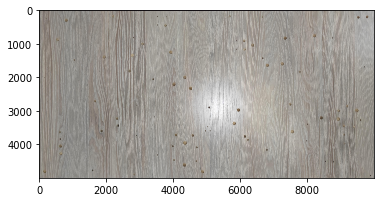

In [3]:
img = imread('res.jpg')
plt.imshow(img)

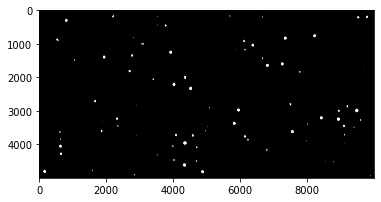

In [4]:
mask = imread('mask_svc.png')
# mask.png generate by GenTrainLabels.ipynb
plt.imshow(mask, cmap='gray')

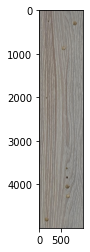

In [5]:
img_tmp = img[:, :1000, :]
plt.imshow(img_tmp)

In [6]:
svc = LinearSVC()

In [7]:
%%time
for x in range(1_000, 10_000, 1_000):
    img_tmp_flatten = flatten_img(img[:, x:x+1_000, :])
    mask_tmp_flatten = (mask[:, x:x+1_000] / 255).flatten()
    svc.fit(img_tmp_flatten, mask_tmp_flatten)

/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to 

CPU times: user 34.8 s, sys: 2.44 s, total: 37.2 s
Wall time: 37.3 s


/home/kehua/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [8]:
%%time
pred_svc = svc.predict(flatten_img(img)

CPU times: user 811 ms, sys: 745 ms, total: 1.56 s
Wall time: 625 ms


/tmp/ipykernel_50013/2193871750.py:4: UserWarning: img_mask.png is a low contrast image
  imsave("img_mask.png", img_mask*255)


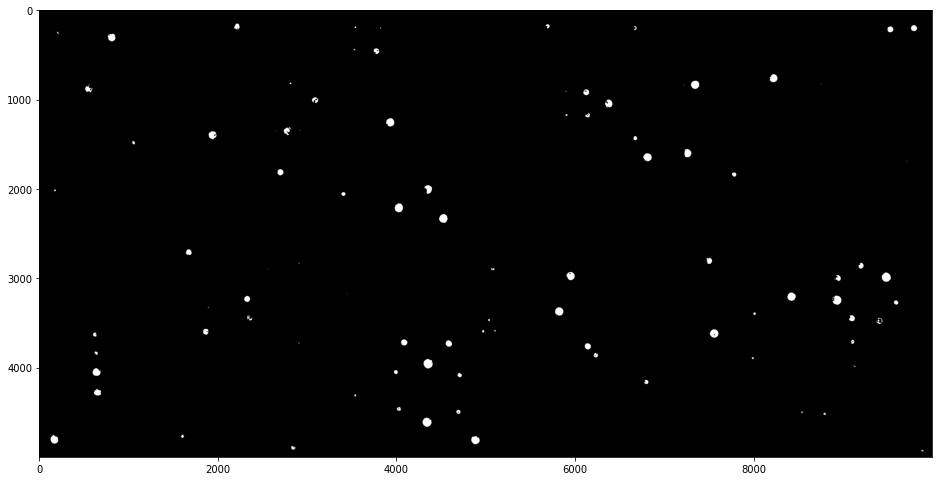

In [21]:
img_mask = pred_svc.reshape(img.shape[0], img.shape[1]).astype(np.uint8)
plt.figure(figsize=(16, 9))
plt.imshow(img_mask, cmap='gray')
imsave("img_mask.png", img_mask*255)

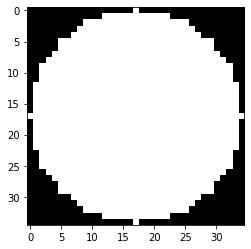

In [12]:
kernel_35 = np.zeros((35, 35), dtype=np.uint8)
cv2.circle(kernel_35, (17, 17), 17, (255,), -1)
plt.imshow(kernel_35, cmap='gray')

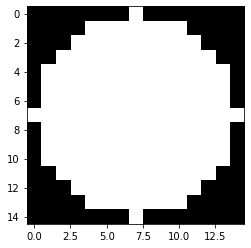

In [10]:
kernel_15 = np.zeros((15, 15), dtype=np.uint8)
cv2.circle(kernel_15, (7, 7), 7, (255,), -1)
plt.imshow(kernel_15, cmap='gray')

/tmp/ipykernel_50013/2249858517.py:4: UserWarning: mask_dilate.png is a low contrast image
  imsave("mask_dilate.png", img_mask_erode * 255)


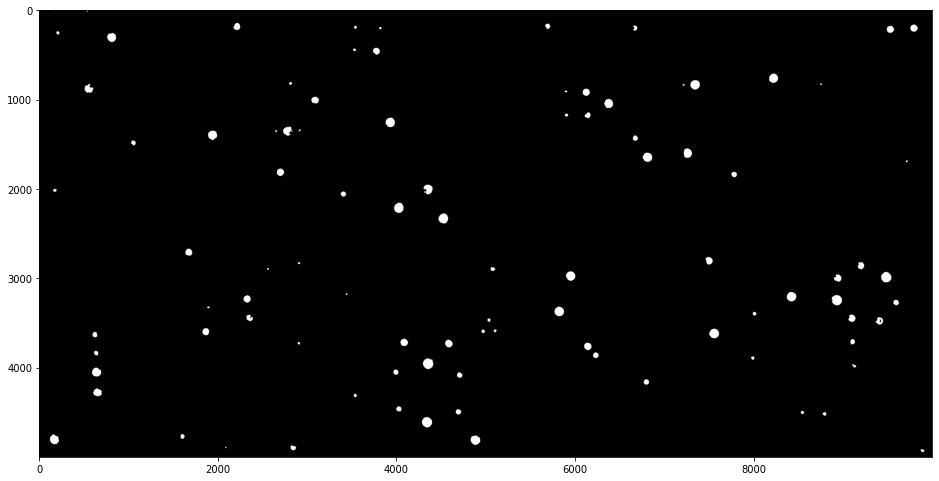

In [19]:
img_mask_erode = cv2.dilate(img_mask, kernel_15)
plt.figure(figsize=(16, 9))
plt.imshow(img_mask_erode, cmap='gray')
imsave("mask_dilate.png", img_mask_erode * 255)

In [12]:
circles = cv2.HoughCircles(
        255 * img_mask_erode, # 8bit single-channel, grayscale input image
        cv2.HOUGH_GRADIENT, # Detection method
        2,                                              # Inverse ratio of the accumulator resolution to the image resolution
        130,                                         # Minimum distance of the two passed to the Canny edge detector
        param1 =100,                     # Higher threshold of the two passed to the  Canny edge detector
        param2 = 20,                      # The smaller it is , the more false circles may be detected
        minRadius=5,                    # Minimum circle radius
        maxRadius=50                 # Maximum circle radius
)

circles.shape

(1, 94, 3)

1.(2331.0, 3231.0), diameter: 8
2.(6127.0, 919.0), diameter: 8
3.(1867.0, 3597.0), diameter: 8
4.(4711.0, 4083.0), diameter: 6
5.(4089.0, 3719.0), diameter: 8
6.(3091.0, 1009.0), diameter: 8
7.(6235.0, 3861.0), diameter: 6
8.(2847.0, 4893.0), diameter: 6
9.(815.0, 305.0), diameter: 10
10.(6379.0, 1043.0), diameter: 10
11.(9101.0, 3449.0), diameter: 8
12.(9531.0, 215.0), diameter: 8
13.(9411.0, 3475.0), diameter: 8
14.(6799.0, 4161.0), diameter: 6
15.(1941.0, 1397.0), diameter: 10
16.(559.0, 881.0), diameter: 9
17.(9203.0, 2863.0), diameter: 7
18.(3777.0, 459.0), diameter: 7
19.(1679.0, 2709.0), diameter: 8
20.(5957.0, 2975.0), diameter: 10
21.(639.0, 4049.0), diameter: 10
22.(2783.0, 1353.0), diameter: 10
23.(6147.0, 3759.0), diameter: 8
24.(625.0, 3629.0), diameter: 6
25.(2215.0, 185.0), diameter: 8
26.(7265.0, 1603.0), diameter: 9
27.(5081.0, 2895.0), diameter: 5
28.(3995.0, 4049.0), diameter: 6
29.(9795.0, 201.0), diameter: 8
30.(173.0, 4809.0), diameter: 9
31.(4587.0, 3731.0), diam

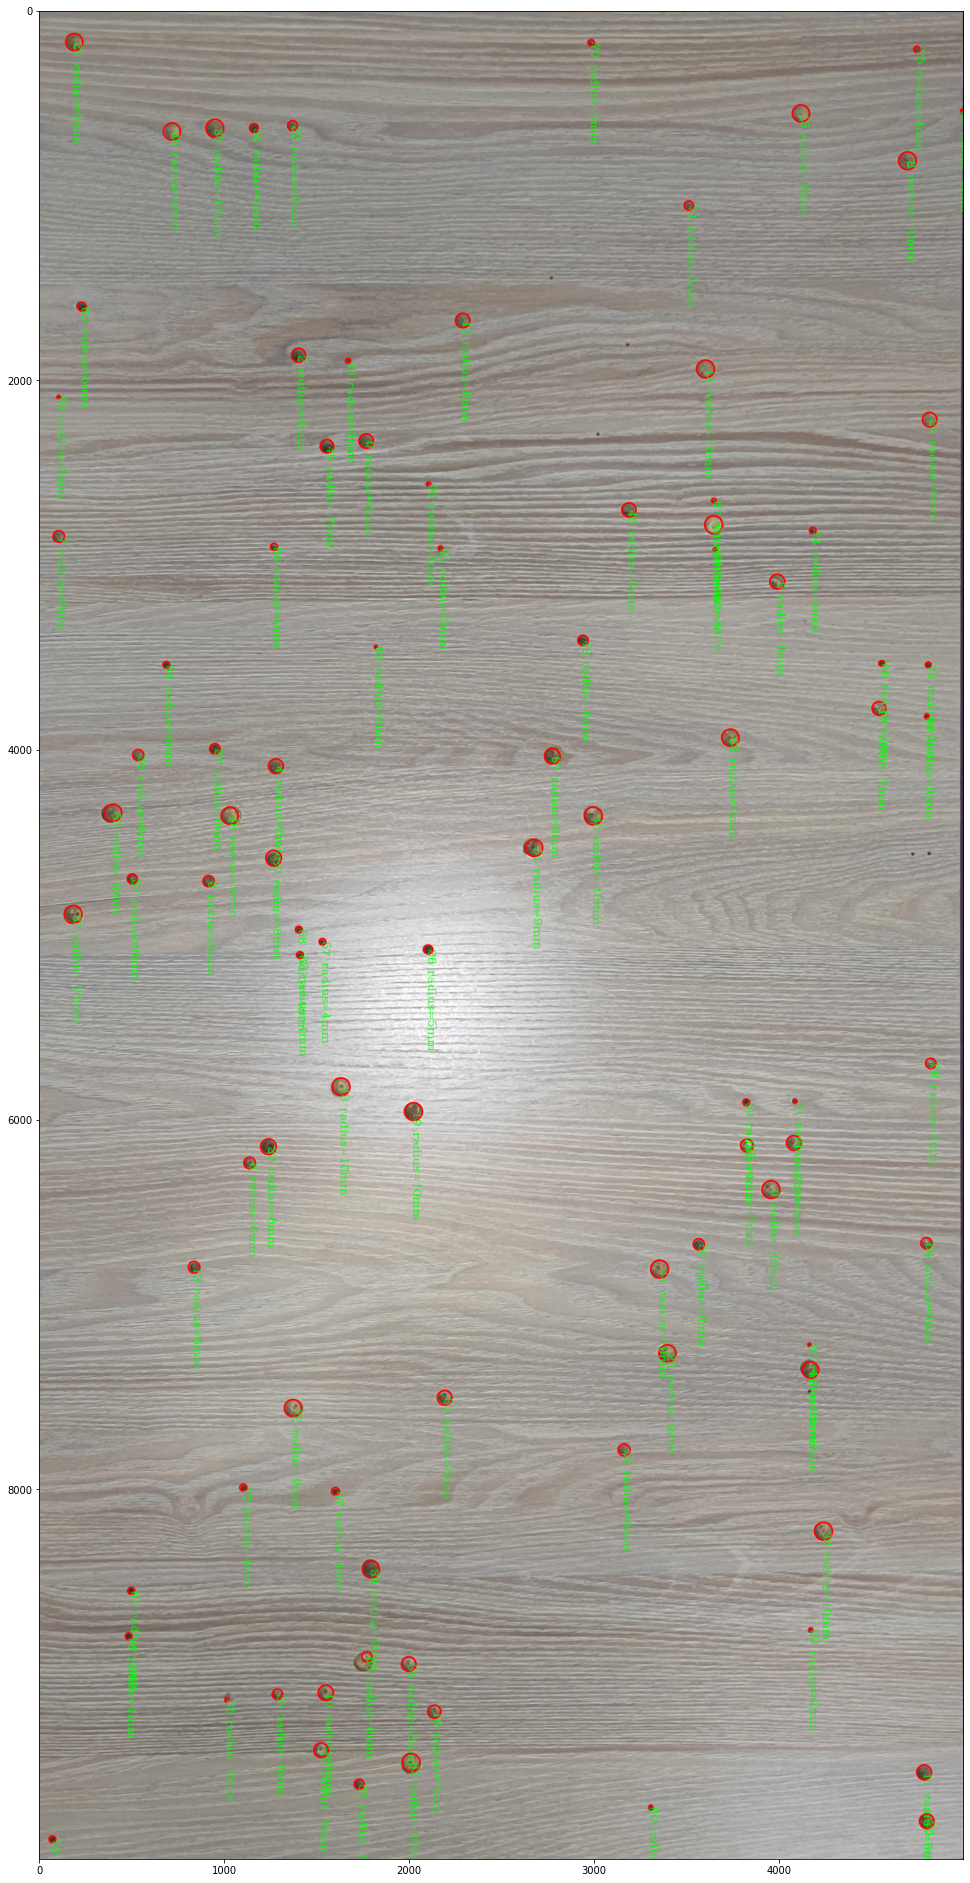

In [13]:
img_tmp = img.copy()
count = 0
r_pred = []
y_pred = []

for circle in circles[0]:
    center = (int(circle[0]),int(circle[1]))
    cv2.circle(img_tmp, center, 1, (0, 100, 100), 3)
    cv2.circle(img_tmp, center, int(circle[2]), (255, 0, 0), 7)
    cv2.putText(img_tmp, f'{str(count)} radius={round(circle[2] / 5)}mm ', center,
                    cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    print(f"{count + 1}.({circle[0]}, {circle[1]}), diameter: {round(circle[2] / 5)}")
    
    y_pred.append([circle[0], circle[1], round(circle[2] / 5)])
    
    count += 1
    
img_tmp = ndimage.rotate(img_tmp, -90)
np.savetxt("pred_circles.txt", y_pred, fmt='%d', delimiter=',')
plt.figure(figsize=(18, 34))
plt.imshow(img_tmp)

In [14]:
imsave("res-real.png", img_tmp)

In [15]:
import pandas as pd

In [17]:
dataset = pd.read_csv("pred_circles.txt", sep=',', header = 0)
dataset.to_csv("pred_circles.csv", index = False)